# Formula 1 Data Analisys

<h3>Aca va la introduccion</h3>

In [5]:
import pandas as pd
import numpy as np
from IPython.display import display_html 
import matplotlib.pyplot as plt
ActualYear = 2020

### Import the data

In [2]:
DriverDataAll = list()
DriverDataAll = [pd.read_html('https://www.formula1.com/en/results.html/'+str(i)+'/drivers.html') for i in range(1958,ActualYear)] 

In [3]:
TeamsDataAll = list()
TeamsDataAll = [pd.read_html('https://www.formula1.com/en/results.html/'+str(i)+'/team.html') for i in range(1958,ActualYear)] 

In [5]:
print(TeamsDataAll[2][0])

   Unnamed: 0  Pos                Team  PTS  Unnamed: 4
0         NaN    1       Cooper Climax   48         NaN
1         NaN    2        Lotus Climax   34         NaN
2         NaN    3             Ferrari   26         NaN
3         NaN    4                 BRM    8         NaN
4         NaN    5     Cooper Maserati    3         NaN
5         NaN    6  Cooper Castellotti    3         NaN


### Save Data as .csv files

In [6]:
for i in range(0,ActualYear-1958): 
    DriverDataAll[i][0].to_csv(r'.\data\Drivers'+str(i+1958)+'.csv', index = False)
    TeamsDataAll[i][0].to_csv(r'.\data\Teams'+str(i+1958)+'.csv', index = False)

In [45]:
print(f'Total Drivers: {len(DriverDataAll)}')
print(f'Total Teams: {len(TeamsDataAll)}')
DriverDataAll[5][0].head()

Total Drivers: 62
Total Teams: 62


,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Unnamed: 6
0,NaN,1,Jim Clark CLA,GBR,Lotus Climax,54,NaN
1,NaN,2,Graham Hill HIL,GBR,BRM,29,NaN
2,NaN,2,Richie Ginther GIN,USA,BRM,29,NaN
3,NaN,4,John Surtees SUR,GBR,Ferrari,22,NaN
4,NaN,5,Dan Gurney GUR,USA,Brabham Climax,19,NaN


### Number of Driver Champions and Constructors Champions

#### Constructors

In [89]:
ConstructorChampions = [TeamsDataAll[i][0].Team[0] for i in range(0,ActualYear-1958)]
ConstructorChampions = pd.DataFrame(ConstructorChampions, columns=["Teams"])
ConstructorChampions
#ConstructorChampions = [ConstructorChampions.count(element) for element in ConstructorChampions]

,Teams
0,Vanwall
1,Cooper Climax
2,Cooper Climax
3,Ferrari
4,BRM
...,...
57,Mercedes
58,Mercedes
59,Mercedes
60,Mercedes


#### Drivers

In [88]:
DriversChampions = [DriverDataAll[i][0].Driver[0] for i in range(0,ActualYear-1958)]
DriversChampions = pd.DataFrame(DriversChampions, columns=["Drivers"])
DriversChampions

,Drivers
0,Mike Hawthorn HAW
1,Jack Brabham BRA
2,Jack Brabham BRA
3,Phil Hill HIL
4,Graham Hill HIL
...,...
57,Lewis Hamilton HAM
58,Nico Rosberg ROS
59,Lewis Hamilton HAM
60,Lewis Hamilton HAM


### All

#### Drivers

In [55]:
Drivers1and2Diff = [DriverDataAll[i][0].PTS[0]-DriverDataAll[i][0].PTS[1] for i in range(0,ActualYear-1958)] 
Drivers1and3Diff = [DriverDataAll[i][0].PTS[0]-DriverDataAll[i][0].PTS[2] for i in range(0,ActualYear-1958)] 

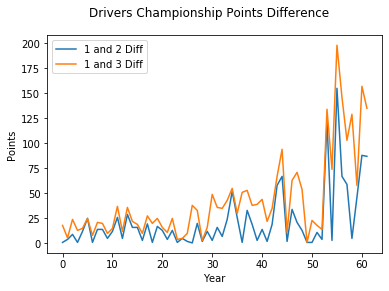

In [90]:
plt.plot(Drivers1and2Diff)
plt.plot(Drivers1and3Diff)
plt.suptitle('Drivers Championship Points Difference')
plt.xlabel("Year")
plt.ylabel("Points")
#plt.show()
plt.legend(["1 and 2 Diff", "1 and 3 Diff"])

In [64]:
Drivers1and2DiffPerc = [(Drivers1and2Diff[i]/DriverDataAll[i][0].PTS[1])*100 for i in range(0,ActualYear-1958)] 
Drivers1and3DiffPerc = [(Drivers1and3Diff[i]/DriverDataAll[i][0].PTS[2])*100 for i in range(0,ActualYear-1958)] 

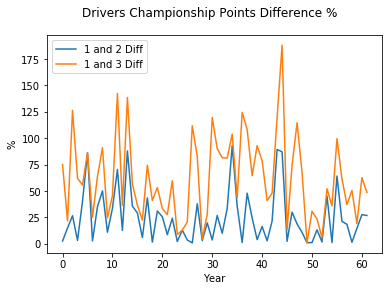

In [65]:
plt.plot(Drivers1and2DiffPerc)
plt.plot(Drivers1and3DiffPerc)
plt.suptitle('Drivers Championship Points Difference %')
plt.xlabel("Year")
plt.ylabel("%")
plt.legend(["1 and 2 Diff", "1 and 3 Diff"])

#### Constructors

In [48]:
Teams1and2Diff = [TeamsDataAll[i][0].PTS[0]-TeamsDataAll[i][0].PTS[1] for i in range(0,ActualYear-1958)] 
Teams1and3Diff = [TeamsDataAll[i][0].PTS[0]-TeamsDataAll[i][0].PTS[2] for i in range(0,ActualYear-1958)] 

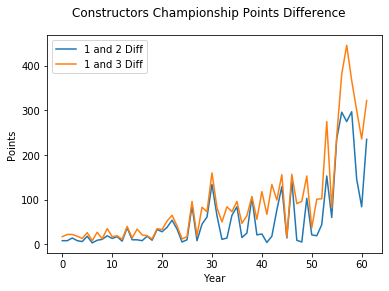

In [91]:
plt.plot(Teams1and2Diff)
plt.plot(Teams1and3Diff)
plt.suptitle('Constructors Championship Points Difference')
plt.xlabel("Year")
plt.ylabel("Points")
plt.legend(["1 and 2 Diff", "1 and 3 Diff"])

In [63]:
Teams1and2DiffPerc = [(Teams1and2Diff[i]/TeamsDataAll[i][0].PTS[1])*100 for i in range(0,ActualYear-1958)] 
Teams1and3DiffPerc = [(Teams1and3Diff[i]/TeamsDataAll[i][0].PTS[2])*100 for i in range(0,ActualYear-1958)] 

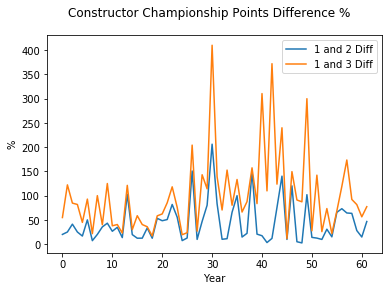

In [69]:
plt.plot(Teams1and2DiffPerc)
plt.suptitle('Constructor Championship Points Difference %')
plt.xlabel("Year")
plt.ylabel("%")
plt.plot(Teams1and3DiffPerc)
plt.legend(["1 and 2 Diff", "1 and 3 Diff"])